# Simple Pump Example Script
This script shows basic I/O operations that can be performed with this toolkit, and gives a very brief overview into basic fault modelling.

This script runs these basic operations on the simple model defined in pump_script.py.

In [5]:
#First, import the fault propogation library as well as the model
import faultprop as fp
import ex_pump as mdl

### Initial Model Checks
Before seeing how faults propogate, it's useful to see how the model performs
in the nominal state to check to see that the model has been defined correctly.
Some things worth checking:
   - are all functions on the graph?
   - are the functions connected with the correct flows?
   - do any faults occur in the nominal state?
   - do all the flow states proceed as desired over time?

The following code runs the model with no faults to let us do that. The inputs are:
    - mdl (the model we imported at the start of the script)
    - track (the flows we wish to track over time)
    - gtrack (a vector of snapshots of the graph we would like to save)

The outputs are:
    - endresults (a dictionary of the degraged flows, resulting faults, and fault classification at final t)
    - resgraph (the results superimposed on the graph at final t)
    - flowhist (the states of the tracked flows over time)
    - ghist (snapshots of the results graph taken at the specified times)


In [6]:
endresults, resgraph, flowhist, ghist=fp.runnominal(mdl, track={'Wat_1','Wat_2', 'EE_1', 'Sig_1'})

With these results, we can now plot the graph of results resgraph using:

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


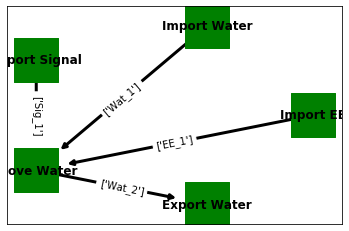

In [7]:
fp.showgraph(resgraph)

As can be seen, this gives a graphical representation of the functional model with the various flows. Since all of the functions are *green*, no faults were accidentally introduced in this run.

We can further look at the state of the flows using:

C:\Users\Daniel Hulse\Documents\GitHub\FFERMAT-deslab\faultprop.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(np.ceil((plots+1)/2),2,n)


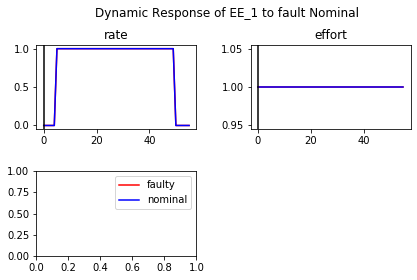

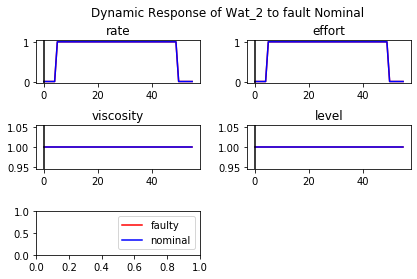

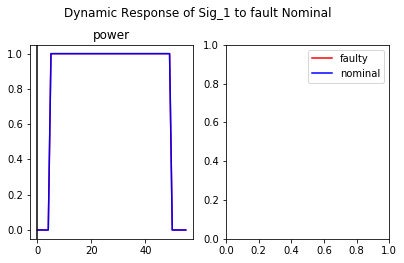

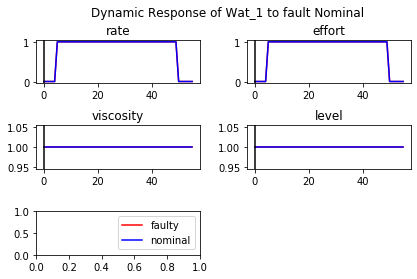

In [8]:
fp.plotflowhist(flowhist, 'Nominal')

As we can see, the state of these flows does exactly what we would expect--when the switch turns on at $t=5$, the pump switches on and there is a flow of water in and out of the model.

### Propagating and Viewing Results for Individual Faults
It is often necessary to see how the system reacts to individual faults. This can gives us better understanding of how the system behaves under individual faults and can let us iterate with the model better.

The following code runs the model with a single fault in a single function. In this case, we are initiating a short in the 'Move Water' function at 10 seconds into the system's operation.

The inputs are:
    - mdl (the model we imported at the start of the script)
    - Function (the function the fault we're interested in propagating occurs in)
    - faultmode (the fault to initiate)
    - time (the time when the fault is initiated)
    - track (the flows we wish to track over time)
    - gtrack (a vector of snapshots of the graph we would like to save)

The outputs are (the same as ffermat.runnominal):
    - endresults (a dictionary of the degraged flows, resulting faults, and fault classification at final t)
    - resgraph (the results superimposed on the graph at final t)
    - flowhist (the states of the tracked flows over time)
    - ghist (snapshots of the results graph taken at the specified times)

In [9]:
endresults, resgraph, flowhist, ghist=fp.proponefault(mdl, 'Move Water', 'short', time=10, track={'Wat_1','Wat_2', 'EE_1', 'Sig_1'})

We can now see what happens with the graph view:

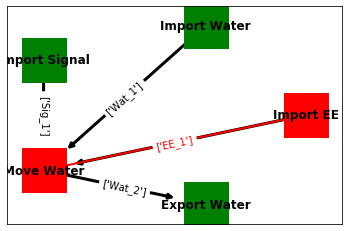

In [10]:
fp.showgraph(resgraph)

As can be seen, the short causes a degraded flow of electricity as well as a fault in the Import EE function. 

However, we would imagine that the short would cause the water to stop moving also--so why is it green?

The answer is that the results graph gives the values of the variables at the final time, which is the same both for the failed model and the nominal model, since the pump is switched "off." In this case we might be more interested in looking at how the graph looks in operation, rather than at the end. We can do that that by taking snapshots of the graph over time using the `gtrack` option, which takes a vector of times we would like to save the snapshot as input.

In [12]:
endresults, resgraph, flowhist, ghist=fp.proponefault(mdl, 'Move Water', 'short', time=10, track={'Wat_1','Wat_2', 'EE_1', 'Sig_1'}, gtrack=[1,10,40, 55])

We can then plot the snapshots using:

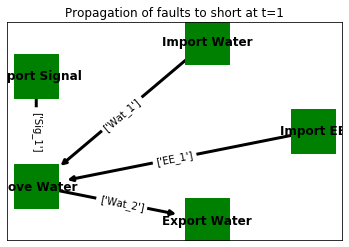

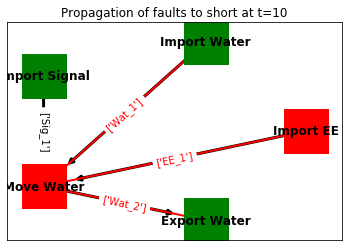

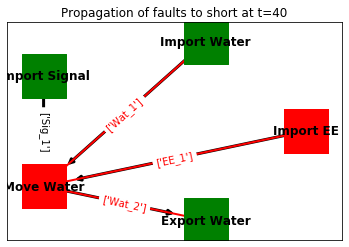

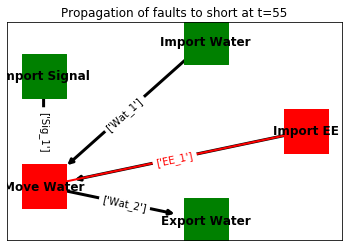

In [14]:
fp.plotghist(ghist, faultscen='short')

As you can see, the system begins nominal until the fault is injected at $t=10$. At this moment, not only are the electrical energy flows degraded, the flow of water is degraded also. However, at $t=55$ when the system is supposed to be turned off, this flow of water is no longer "degraded" because it is in the same state as the nominal system.

We can look at the tracked variables to see more precisely what happened. Note that we need to give the plotting function the mode ('short') and the time for it to plot properly.

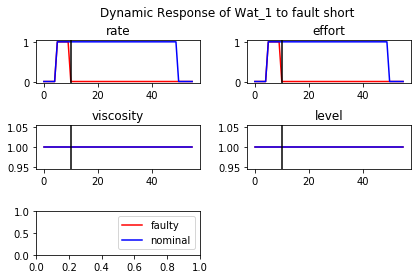

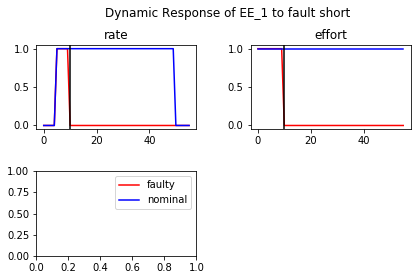

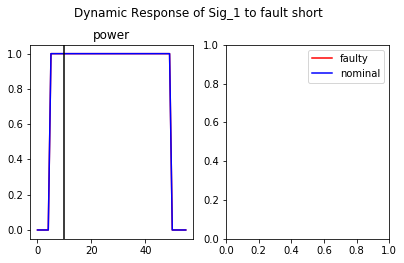

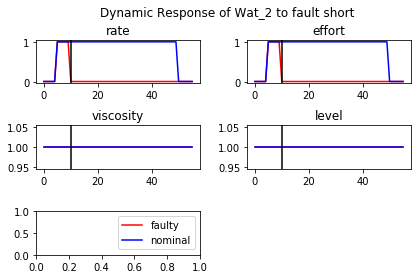

In [11]:
fp.plotflowhist(flowhist, 'short', time=10)

Here we can see that the short dropped the voltage to zero, (this was because an open circuit resulted in the Import EE function), causing the water to stop flowing. If we want to see a summary of these results (as well as the classification given by the function in the model), we can also look at a table with the result:

In [13]:
t=fp.printresult('Move Water', 'short', 10, endresults)

In [15]:
t.show_in_notebook()

idx,Function,Mode,Time,Effects,Rate,Cost,Expected Cost
0,Move Water,short,10,"['EE_1', 'Import EE', 'Move Water']",1e-07,20000.0,200.0


We can also look at other faults. The results below are for a blockage of the pipe. In this case we're only interested in the effect on the water going through, so only those flows are tracked.

In [15]:
endresults2, resgraph2, flowhist2, ghist2=fp.proponefault(mdl, 'Export Water', 'block', time=10, track={'Wat_1','Wat_2'})


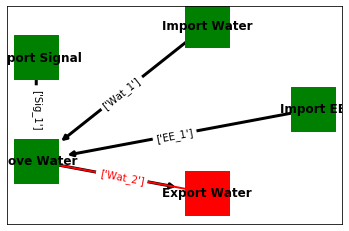

In [16]:
fp.showgraph(resgraph2)

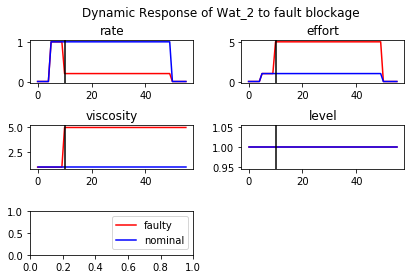

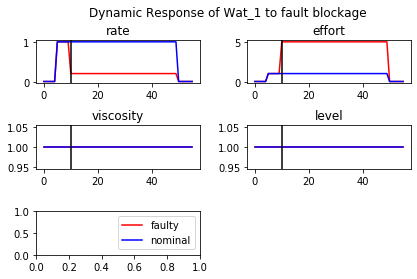

In [17]:
fp.plotflowhist(flowhist2, 'blockage', time=10)

In [18]:
t2=fp.printresult('Export Water', 'block', 10, endresults2)
t2.show_in_notebook()

idx,Function,Mode,Time,Effects,Rate,Cost,Expected Cost
0,Export Water,block,10,"['Wat_2', 'Export Water']",1e-05,10000.0,10000.0


### Running a List of Faults
Finally, to get the results of all of the single-fault scenarios defined in the model, we can run them all at once using the proplist function. Note that this will propogate faults based on the times vector put in the model, e.g. if times=[0,3,15,55], it will propogate the faults at the begining, end, and at t=15 and t=15. This function only takes in the model mdl and outputs two similar kinds of output--resultsdict (the results in a python dicitonary) and resultstab (the results in a nice tabular form). See below:

In [19]:
resultsdict, resultstab=fp.proplist(mdl)

In [20]:
resultstab.show_in_notebook()

idx,Function,Mode,Time,Effects,Rate,Cost,Expected Cost
0,Import EE,no_v,0,"{'EE_1': {'rate': 0.0, 'effort': 0.0}}{'Import EE': {'no_v'}}",1e-05,10000.0,10000.0
1,Import EE,inf_v,0,{}{'Import EE': {'inf_v'}},1e-07,10000.0,100.0
2,Import Water,no_wat,0,"{'Wat_1': {'rate': 0.0, 'effort': 0.0, 'viscosity': 1.0, 'level': 0.0}}{'Import Water': {'no_wat'}}",1e-05,10000.0,10000.0
3,Import Signal,no_sig,0,{}{'Import Signal': {'no_sig'}},1e-05,10000.0,10000.0
4,Move Water,mech_break,0,{}{'Move Water': {'mech_break'}},1e-05,10000.0,10000.0
5,Move Water,short,0,"{'EE_1': {'rate': 0.0, 'effort': 0.0}}{'Import EE': {'no_v'}, 'Move Water': {'short'}}",1e-07,20000.0,200.0
6,Export Water,block,0,"{'Wat_2': {'rate': 0.0, 'effort': 0.0, 'viscosity': 5.0, 'level': 1.0}}{'Export Water': {'block'}}",1e-05,10000.0,10000.0
7,Import EE,no_v,3,"{'EE_1': {'rate': 0.0, 'effort': 0.0}}{'Import EE': {'no_v'}}",1e-05,10000.0,10000.0
8,Import EE,inf_v,3,{}{'Import EE': {'inf_v'}},1e-07,10000.0,100.0
9,Import Water,no_wat,3,"{'Wat_1': {'rate': 0.0, 'effort': 0.0, 'viscosity': 1.0, 'level': 0.0}}{'Import Water': {'no_wat'}}",1e-05,10000.0,10000.0
